In [1]:
import cv2
import numpy as np

In [33]:
img=cv2.imread("/Users/lakshmikeerthanaaravapalli/Desktop/ComputerVision/hand.jpg")
img=cv2.resize(img,(600,700))
img_gry=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

blur=cv2.medianBlur(img_gry,9)

ret,thresh=cv2.threshold(blur,240,255,cv2.THRESH_BINARY_INV)

dilated=cv2.dilate(thresh,(1,1),iterations=6)

cnts,hier = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    epsilon = 0.0001*cv2.arcLength(c,True)
    data= cv2.approxPolyDP(c,epsilon,True)
    
    hull = cv2.convexHull(data)
    
    
    cv2.drawContours(img, [c], -1, (50, 50, 150), 2)
    cv2.drawContours(img, [hull], -1, (0, 255, 0), 2)

#find convexity defect
hull2 = cv2.convexHull(cnts[0],returnPoints = False)
#defect returns an array which contain value  [start_point, end_point, farthest_point, approximate_distance to farthest point ]
defect = cv2.convexityDefects(cnts[0],hull2)

for i in range(defect.shape[0]):
    s,e,f,d = defect[i,0]
    print(s,e,f,d)
    start = tuple(c[s][0])
    end = tuple(c[e][0])
    far = tuple(c[f][0])
    #cv2.line(img,start,end,[255,0,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)
    

  
#Extreme Points
#It means topmost, bottommost, rightmost and leftmost points of the object.

c_max = max(cnts, key=cv2.contourArea)

# determine the most extreme points along the contour
extLeft = tuple(c_max[c_max[:, :, 0].argmin()][0])
extRight = tuple(c_max[c_max[:, :, 0].argmax()][0])
extTop = tuple(c_max[c_max[:, :, 1].argmin()][0])
extBot = tuple(c_max[c_max[:, :, 1].argmax()][0])

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal

cv2.circle(img, extLeft, 8, (255, 0, 255), -1)  #pink
cv2.circle(img, extRight, 8, (0, 125, 255), -1) #brown
cv2.circle(img, extTop, 8, (255, 10, 0), -1)  #blue
cv2.circle(img, extBot, 8, (19, 152, 152), -1) #green


0 142 45 57260
142 144 143 114
144 146 145 154
146 148 147 154
148 332 241 46167
332 334 333 142
334 338 335 162
339 341 340 162
341 343 342 114
343 530 443 25310
531 533 532 162
533 649 546 4368
649 659 650 229
659 661 660 186
661 801 702 3365
802 804 803 186
804 806 805 114
806 808 807 142
809 1022 956 50166
1022 1024 1023 142
1024 1030 1025 114
1030 1104 1065 53017
1104 1106 1105 162


array([[[254, 254, 254],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [249, 255, 254],
        [247, 255, 254],
        [247, 255, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [250, 250, 250],
        ...,
        [249, 255, 254],
        [247, 255, 254],
        [247, 255, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [250, 250, 250],
        ...,
        [249, 255, 254],
        [247, 255, 254],
        [247, 255, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

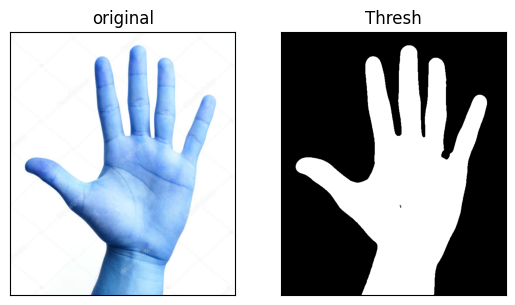

In [32]:
titles = ["original","Thresh"]
images = [img,thresh]

#if you want then plot it
from matplotlib import pyplot as plt
for i in range(len(titles)):
    plt.subplot(1,2, i+1), 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])